## ChatGPT Face Detector
Below are two programs about face recognition obtained from ChatGPT using various techniques of machine learning. 

### Background Context
##### K-Nearest Neighbors (KNN)
A popular supervised machine learning algorithm used in regression and classification. The model prediction is based on the similarities between the unseen data from the test set and its k nearest neighbors in the training set.<br>
- **Advantage:** simple and easy to implement <br>
- **Disadvantage:** lazy learner (train while making prediction) so slower and more costly (memory)

##### Convolutional Neural Network (CNN)
A type of deep learning neural network architecture used for image and speech processing. By using multiple interconnected layers, they can extract useful features from the input data and use them to make predictions<br>
- **Advantage:** multiple layers enable capture and recognize variations of data<br>
- **Disadvantage:** high complexity (expensive to train and use)<br>

### About the Dataset
The file contains two set of data: training and testing in the `train` and `val` folders respectively. Each of them contains two set of randomly chosen images displaying two different type of facial expressions: happy and sad. 

Data size: 
|  | train | test |
| --- | --- | --- |
| happy men | 25 | 5 |
| happy women | 25 | 5 |
| sad men | 25 | 5 |
| sad women | 25 | 5 |

[Image Source](https://stock.adobe.com/)

### Your tasks: 
KNN Model:
- Explain what does `Accuracy` tells you.
- Compute `precision` and `recall` and explain what they mean.
<br>

CNN Model:
- Train the model with the given dataset. What could do potentially improves `accuracy` of the model?
- Explain what does `loss` and `accuracy` tells you.
- Compute TP, TN, FP, FN
- Compute Precision and Recall
- How much of the True Positive were Male? Female?
- How much of the True Negative were Male? Female?
- Create a bar chart to show these proportion in terms of percentage.

### Format:
- For questions that require justification, include all your answers in a (one) Markdown cell after each program.
- For questions that require programming output, make sure it's clear what each output is. 

In [2]:
#use KNN
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Load the LFW dataset
# downloads and returns the images of people's face and labels
# only include people with at least 70 images in the dataset
lfw = datasets.fetch_lfw_people(min_faces_per_person=70)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(lfw.data, lfw.target, test_size=0.2, random_state=42)

# Train a K-Nearest Neighbors classifier
# n_neighbors: use the 5 nearest neighbors to make the predictions
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = knn.predict(X_test)

# Calculate the accuracy of the classifier
# comparing the predicted labels (y_pred) with the true labels (y_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Print the accuracy of the classifier
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

# accuracy gives the proportion of accurately predicted sample from the total number of sample
# the closer to 1 the better


Accuracy: 0.6085271317829457
Precision: 0.5951639802465996
Recall: 0.6085271317829457


Accuracy tells us the ratio (unnormalized) of correctly predicted labels within the fed dataset. More specifically, after asking the model to predict on 'X_test,' it produces its dataframe of predictions into y_pred. The ratio of differences between y_pred and y_test dataframe (which is the frame that contains the properly labeled 'answers' or 'outputs') is then calculated by counting the differences between the two. In short, accuracy tells us the percentage of correct labels it got on the predicted test set.

The formula for Precision is as such: tp/(tp+fp) where tp and fp are true positives and false positives respectively. The precision tells us the ratio of correctly labeled positives to the total ratio of positives. Essentially, it judges the ability of the model to correctly identify a positive label. For example, precision can tell us the ratio between the correct amount of happy faces it detected versus the total amount of happy faces it detected. 

The formula for Recall is as such: tp/(tp+fn) where tp and fn are true positives and false negatives respectively. Recall tells us the amount of positives the model predicted correctly out of all positives that exist within the dataset. 


In [14]:
#general

#use CNN
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the directory paths for the training and validation datasets
train_dir = 'general/train'
val_dir = 'general/val'

# Define the number of classes (happy and sad)
num_classes = 2

# Define the input shape of the images
input_shape = (160, 160, 1)

# Define the batch size for the data generators
batch_size = 5

# Define the data generators for the training and validation datasets
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=input_shape[:2],
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=input_shape[:2],
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples//batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples//batch_size
)

# Save the model
#model.save('face_classification_model.h5')

y_pred_train = model.predict(train_generator)
y_true_train = train_generator.classes

y_pred_val = model.predict(val_generator)
y_true_val = val_generator.classes

y_pred_binary_train = np.argmax(y_pred_train, axis=1)
y_pred_binary_val = np.argmax(y_pred_val, axis=1)

cm_train = confusion_matrix(y_true_train, y_pred_binary_train)
cm_val = confusion_matrix(y_true_val, y_pred_binary_val)

TP = cm_train[1, 1]
TN = cm_train[0, 0]
FP = cm_train[0, 1]
FN = cm_train[1, 0]

print("\n Training Values:")
print("True Positive (TP):", TP)
print("True Negative (TN):", TN)
print("False Positive (FP):", FP)
print("False Negative (FN):", FN)

TP = cm_val[1, 1]
TN = cm_val[0, 0]
FP = cm_val[0, 1]
FN = cm_val[1, 0]

print("\n Validation Values:")
print("True Positive (TP):", TP)
print("True Negative (TN):", TN)
print("False Positive (FP):", FP)
print("False Negative (FN):", FN)

precision = precision_score(y_true_train, y_pred_binary_train, average='weighted')
recall = recall_score(y_true_train, y_pred_binary_train, average='weighted')
print("\nPrecision Train:", precision)
print("Recall Train:", recall)
precision = precision_score(y_true_val, y_pred_binary_val, average='weighted')
recall = recall_score(y_true_val, y_pred_binary_val, average='weighted')
print("Precision Val:", precision)
print("Recall Val:", recall)

Found 100 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Epoch 1/10
20/20 [==============================] - 1s 18ms/step - loss: 1.3326 - accuracy: 0.4500 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 2/10
20/20 [==============================] - 0s 11ms/step - loss: 0.6941 - accuracy: 0.5000 - val_loss: 0.6929 - val_accuracy: 0.5500
Epoch 3/10
20/20 [==============================] - 0s 12ms/step - loss: 0.6923 - accuracy: 0.6200 - val_loss: 0.6877 - val_accuracy: 0.5000
Epoch 4/10
20/20 [==============================] - 0s 10ms/step - loss: 0.6862 - accuracy: 0.5300 - val_loss: 0.6804 - val_accuracy: 0.6000
Epoch 5/10
20/20 [==============================] - 0s 10ms/step - loss: 0.8608 - accuracy: 0.5700 - val_loss: 0.6739 - val_accuracy: 0.5000
Epoch 6/10
20/20 [==============================] - 0s 10ms/step - loss: 0.6898 - accuracy: 0.5400 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 7/10
20/20 [==============================] - 0s 10ms/step - loss: 

In [12]:
#male

#use CNN
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the directory paths for the training and validation datasets
train_dir = 'male/train'
val_dir = 'male/val'

# Define the number of classes (happy and sad)
num_classes = 2

# Define the input shape of the images
input_shape = (160, 160, 1)

# Define the batch size for the data generators
batch_size = 5

# Define the data generators for the training and validation datasets
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=input_shape[:2],
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=input_shape[:2],
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples//batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples//batch_size
)

# Save the model
#model.save('face_classification_model.h5')

y_pred_train = model.predict(train_generator) #train_generator
y_true_train = train_generator.classes

y_pred_val = model.predict(val_generator)
y_true_val = val_generator.classes

y_pred_binary_train = np.argmax(y_pred_train, axis=1)
y_pred_binary_val = np.argmax(y_pred_val, axis=1)

cm_train = confusion_matrix(y_true_train, y_pred_binary_train)
cm_val = confusion_matrix(y_true_val, y_pred_binary_val)

TP = cm_train[1, 1]
TN = cm_train[0, 0]
FP = cm_train[0, 1]
FN = cm_train[1, 0]

print("\n Training Values:")
print("True Positive (TP):", TP)
print("True Negative (TN):", TN)
print("False Positive (FP):", FP)
print("False Negative (FN):", FN)

TP = cm_val[1, 1]
TN = cm_val[0, 0]
FP = cm_val[0, 1]
FN = cm_val[1, 0]

print("\n Validation Values:")
print("True Positive (TP):", TP)
print("True Negative (TN):", TN)
print("False Positive (FP):", FP)
print("False Negative (FN):", FN)

precision = precision_score(y_true_train, y_pred_binary_train, average='weighted')
recall = recall_score(y_true_train, y_pred_binary_train, average='weighted')
print("\nPrecision Train:", precision)
print("Recall Train:", recall)
precision = precision_score(y_true_val, y_pred_binary_val, average='weighted')
recall = recall_score(y_true_val, y_pred_binary_val, average='weighted')
print("Precision Val:", precision)
print("Recall Val:", recall)

Found 50 images belonging to 2 classes.
Found 10 images belonging to 2 classes.
Epoch 1/10
10/10 [==============================] - 2s 23ms/step - loss: 1.5984 - accuracy: 0.5000 - val_loss: 0.6938 - val_accuracy: 0.5000
Epoch 2/10
10/10 [==============================] - 0s 12ms/step - loss: 0.6949 - accuracy: 0.5000 - val_loss: 0.6940 - val_accuracy: 0.5000
Epoch 3/10
10/10 [==============================] - 0s 12ms/step - loss: 0.6935 - accuracy: 0.5000 - val_loss: 0.6938 - val_accuracy: 0.5000
Epoch 4/10
10/10 [==============================] - 0s 14ms/step - loss: 0.6941 - accuracy: 0.5400 - val_loss: 0.6940 - val_accuracy: 0.5000
Epoch 5/10
10/10 [==============================] - 0s 11ms/step - loss: 0.6909 - accuracy: 0.5200 - val_loss: 0.6966 - val_accuracy: 0.4000
Epoch 6/10
10/10 [==============================] - 0s 12ms/step - loss: 0.6746 - accuracy: 0.6200 - val_loss: 0.7582 - val_accuracy: 0.3000
Epoch 7/10
10/10 [==============================] - 0s 11ms/step - loss: 0

In [10]:
#female

#use CNN
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the directory paths for the training and validation datasets
train_dir = 'female/train'
val_dir = 'female/val'

# Define the number of classes (happy and sad)
num_classes = 2

# Define the input shape of the images
input_shape = (160, 160, 1)

# Define the batch size for the data generators
batch_size = 5

# Define the data generators for the training and validation datasets
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=input_shape[:2],
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=input_shape[:2],
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples//batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples//batch_size
)

# Save the model
#model.save('face_classification_model.h5')

y_pred_train = model.predict(train_generator) #train_generator
y_true_train = train_generator.classes

y_pred_val = model.predict(val_generator)
y_true_val = val_generator.classes

y_pred_binary_train = np.argmax(y_pred_train, axis=1)
y_pred_binary_val = np.argmax(y_pred_val, axis=1)

cm_train = confusion_matrix(y_true_train, y_pred_binary_train)
cm_val = confusion_matrix(y_true_val, y_pred_binary_val)

TP = cm_train[1, 1]
TN = cm_train[0, 0]
FP = cm_train[0, 1]
FN = cm_train[1, 0]

print("\n Training Values:")
print("True Positive (TP):", TP)
print("True Negative (TN):", TN)
print("False Positive (FP):", FP)
print("False Negative (FN):", FN)

TP = cm_val[1, 1]
TN = cm_val[0, 0]
FP = cm_val[0, 1]
FN = cm_val[1, 0]

print("\n Validation Values:")
print("True Positive (TP):", TP)
print("True Negative (TN):", TN)
print("False Positive (FP):", FP)
print("False Negative (FN):", FN)

precision = precision_score(y_true_train, y_pred_binary_train, average='weighted')
recall = recall_score(y_true_train, y_pred_binary_train, average='weighted')
print("\nPrecision Train:", precision)
print("Recall Train:", recall)
precision = precision_score(y_true_val, y_pred_binary_val, average='weighted')
recall = recall_score(y_true_val, y_pred_binary_val, average='weighted')
print("Precision Val:", precision)
print("Recall Val:", recall)

Found 50 images belonging to 2 classes.
Found 10 images belonging to 2 classes.
Epoch 1/10
10/10 [==============================] - 1s 46ms/step - loss: 0.8380 - accuracy: 0.4000 - val_loss: 0.6972 - val_accuracy: 0.5000
Epoch 2/10
10/10 [==============================] - 0s 13ms/step - loss: 0.6967 - accuracy: 0.4000 - val_loss: 0.6924 - val_accuracy: 0.5000
Epoch 3/10
10/10 [==============================] - 1s 90ms/step - loss: 0.6940 - accuracy: 0.4600 - val_loss: 0.6925 - val_accuracy: 0.6000
Epoch 4/10
10/10 [==============================] - 0s 14ms/step - loss: 0.6932 - accuracy: 0.5200 - val_loss: 0.6920 - val_accuracy: 0.6000
Epoch 5/10
10/10 [==============================] - 0s 11ms/step - loss: 0.6938 - accuracy: 0.3800 - val_loss: 0.6919 - val_accuracy: 0.6000
Epoch 6/10
10/10 [==============================] - 0s 11ms/step - loss: 0.6939 - accuracy: 0.4600 - val_loss: 0.6921 - val_accuracy: 0.6000
Epoch 7/10
10/10 [==============================] - 0s 11ms/step - loss: 0

To improve the accuracy of the model, we can adjust the various hyperparameters such as batch_size and epochs. Since our dataset is very small, we can lower the batch size from 5 to 2 or 3. We can also increase the total number of Convolution layers to extract more features as well as add Dropout layers to reduce overfitting. Lastly we can reduce the learning rate to something like 1e-6. 

**Accuracy:** Proportion of correct prediction out of total prediction of the training/testing data.
- The higher the better
<br>

**Loss:** Measures the difference between the predicted and true output of the training/testing data. 
- The lower the better

Our loss function is cross-entropy which provides a loss value within the logarithmic scale. In general, loss will describe to us how well our model reflects the training data. It compares the predicted output versus the target output.
Accuracy is the ratio of correct predictions versus all predictions. 

#Refer to above for metrics

### Training Set
TP:

Male - 14 
Female - 4
General - 20

TN:

Male - 22
Female - 25
General - 46

### Test Set

TP:

Male - 1
Female - 2
General - 3

TN:

Male - 3
Female - 5
General - 8

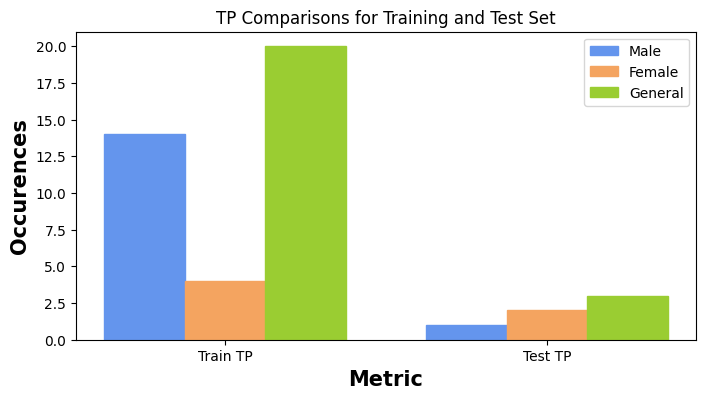

In [26]:
import numpy as np
import matplotlib.pyplot as plt

#[Training Set TP, Test Set TP]
male = [14,1]
female = [4,2]
general = [20,3]

fig = plt.subplots(figsize=(8,4))
barWidth = 0.25

br1 = np.arange(len(male))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

plt.bar(br1, male, color ='cornflowerblue', width = barWidth,
        edgecolor ='cornflowerblue', label ='Male')
plt.bar(br2, female, color ='sandybrown', width = barWidth,
        edgecolor ='sandybrown', label ='Female')
plt.bar(br3, general, color ='yellowgreen', width = barWidth,
        edgecolor ='yellowgreen', label ='General')

plt.title("TP Comparisons for Training and Test Set")

plt.xlabel('Metric', fontweight = 'bold', fontsize = 15)
plt.ylabel('Occurences', fontweight = 'bold', fontsize = 15)
plt.xticks([r+barWidth for r in range(len(male))], ['Train TP', 'Test TP'])

plt.legend()
plt.show()

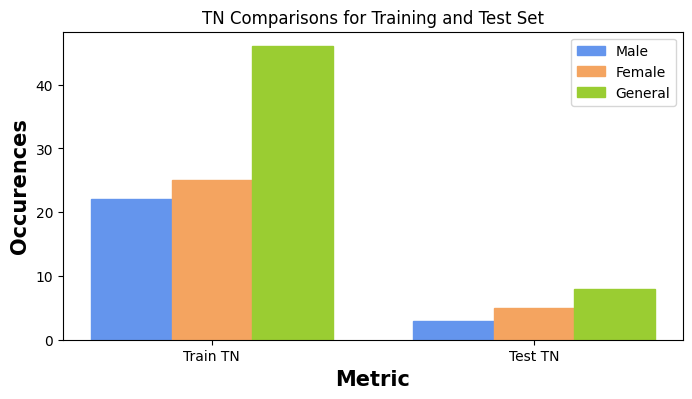

In [27]:
#[Training Set TN, Test Set TN]
male = [22,3]
female = [25,5]
general = [46,8]

fig = plt.subplots(figsize=(8,4))
barWidth = 0.25

br1 = np.arange(len(male))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

plt.bar(br1, male, color ='cornflowerblue', width = barWidth,
        edgecolor ='cornflowerblue', label ='Male')
plt.bar(br2, female, color ='sandybrown', width = barWidth,
        edgecolor ='sandybrown', label ='Female')
plt.bar(br3, general, color ='yellowgreen', width = barWidth,
        edgecolor ='yellowgreen', label ='General')

plt.title("TN Comparisons for Training and Test Set")

plt.xlabel('Metric', fontweight = 'bold', fontsize = 15)
plt.ylabel('Occurences', fontweight = 'bold', fontsize = 15)
plt.xticks([r+barWidth for r in range(len(male))], ['Train TN', 'Test TN'])

plt.legend()
plt.show()

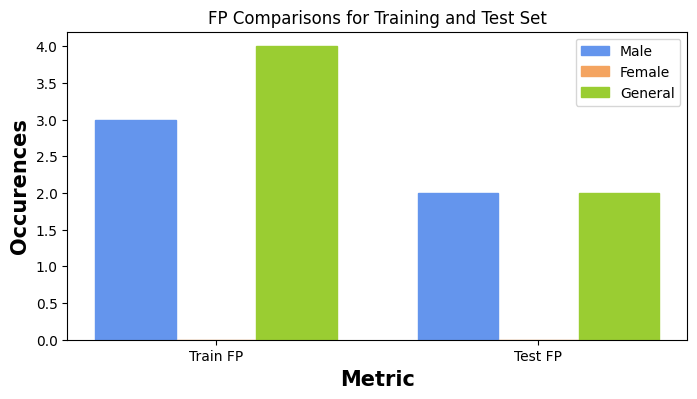

In [28]:
#[Training Set FP, Test Set FP]
male = [3,2]
female = [0,0]
general = [4,2]

fig = plt.subplots(figsize=(8,4))
barWidth = 0.25

br1 = np.arange(len(male))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

plt.bar(br1, male, color ='cornflowerblue', width = barWidth,
        edgecolor ='cornflowerblue', label ='Male')
plt.bar(br2, female, color ='sandybrown', width = barWidth,
        edgecolor ='sandybrown', label ='Female')
plt.bar(br3, general, color ='yellowgreen', width = barWidth,
        edgecolor ='yellowgreen', label ='General')

plt.title("FP Comparisons for Training and Test Set")

plt.xlabel('Metric', fontweight = 'bold', fontsize = 15)
plt.ylabel('Occurences', fontweight = 'bold', fontsize = 15)
plt.xticks([r+barWidth for r in range(len(male))], ['Train FP', 'Test FP'])

plt.legend()
plt.show()

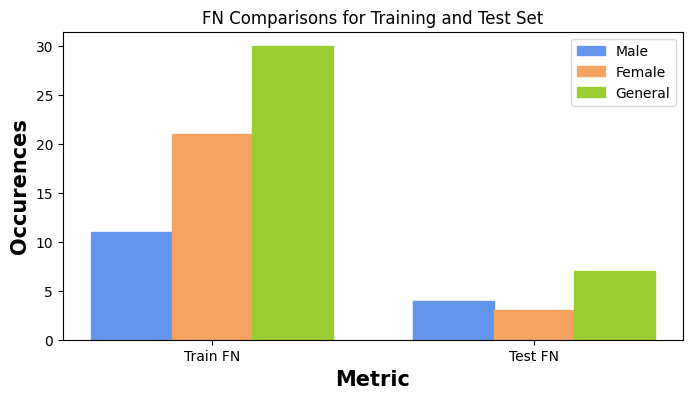

In [29]:
import numpy as np
import matplotlib.pyplot as plt

#[Training Set FN, Test Set FN]
male = [11,4]
female = [21,3]
general = [30,7]

fig = plt.subplots(figsize=(8,4))
barWidth = 0.25

br1 = np.arange(len(male))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

plt.bar(br1, male, color ='cornflowerblue', width = barWidth,
        edgecolor ='cornflowerblue', label ='Male')
plt.bar(br2, female, color ='sandybrown', width = barWidth,
        edgecolor ='sandybrown', label ='Female')
plt.bar(br3, general, color ='yellowgreen', width = barWidth,
        edgecolor ='yellowgreen', label ='General')

plt.title("FN Comparisons for Training and Test Set")

plt.xlabel('Metric', fontweight = 'bold', fontsize = 15)
plt.ylabel('Occurences', fontweight = 'bold', fontsize = 15)
plt.xticks([r+barWidth for r in range(len(male))], ['Train FN', 'Test FN'])

plt.legend()
plt.show()

Im actually so confused on what to do but up there ^^ i retrained on male and female specific directories. from here to the bottom is using the general model to predict on male and female images :(

In [3]:
#retraining the model to predict again later

#use CNN
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Define the directory paths for the training and validation datasets
train_dir = 'general/train'
val_dir = 'general/val'

# Define the number of classes (happy and sad)
num_classes = 2

# Define the input shape of the images
input_shape = (160, 160, 1)

# Define the batch size for the data generators
batch_size = 5

# Define the data generators for the training and validation datasets
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=input_shape[:2],
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=input_shape[:2],
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples//batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples//batch_size
)

# Save the model
#model.save('face_classification_model.h5')

y_pred_train = model.predict(train_generator)
y_true_train = train_generator.classes

y_pred_val = model.predict(val_generator)
y_true_val = val_generator.classes

y_pred_binary_train = np.argmax(y_pred_train, axis=1)
y_pred_binary_val = np.argmax(y_pred_val, axis=1)

cm_train = confusion_matrix(y_true_train, y_pred_binary_train)
cm_val = confusion_matrix(y_true_val, y_pred_binary_val)

TP = cm_train[1, 1]
TN = cm_train[0, 0]
FP = cm_train[0, 1]
FN = cm_train[1, 0]

print("\n Training Values:")
print("True Positive (TP):", TP)
print("True Negative (TN):", TN)
print("False Positive (FP):", FP)
print("False Negative (FN):", FN)

TP = cm_val[1, 1]
TN = cm_val[0, 0]
FP = cm_val[0, 1]
FN = cm_val[1, 0]

print("\n Validation Values:")
print("True Positive (TP):", TP)
print("True Negative (TN):", TN)
print("False Positive (FP):", FP)
print("False Negative (FN):", FN)

precision = precision_score(y_true_train, y_pred_binary_train, average='weighted')
recall = recall_score(y_true_train, y_pred_binary_train, average='weighted')
print("\nPrecision Train:", precision)
print("Recall Train:", recall)
precision = precision_score(y_true_val, y_pred_binary_val, average='weighted')
recall = recall_score(y_true_val, y_pred_binary_val, average='weighted')
print("Precision Val:", precision)
print("Recall Val:", recall)

Found 100 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Epoch 1/10
20/20 [==============================] - 1s 24ms/step - loss: 0.8114 - accuracy: 0.3500 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/10
20/20 [==============================] - 0s 10ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 3/10
20/20 [==============================] - 0s 10ms/step - loss: 0.6966 - accuracy: 0.4000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/10
20/20 [==============================] - 0s 10ms/step - loss: 0.6950 - accuracy: 0.2600 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 5/10
20/20 [==============================] - 0s 10ms/step - loss: 0.6941 - accuracy: 0.4100 - val_loss: 0.6928 - val_accuracy: 0.6000
Epoch 6/10
20/20 [==============================] - 0s 10ms/step - loss: 0.7004 - accuracy: 0.4200 - val_loss: 0.6919 - val_accuracy: 0.5000
Epoch 7/10
20/20 [==============================] - 0s 10ms/step - loss: 

In [4]:
#getting output on male directory without retraining

train_generator = train_datagen.flow_from_directory(
    'male/train',
    target_size=input_shape[:2],
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

val_generator = val_datagen.flow_from_directory(
    'male/val',
    target_size=input_shape[:2],
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

y_pred_train = model.predict(train_generator)
y_true_train = train_generator.classes

y_pred_val = model.predict(val_generator)
y_true_val = val_generator.classes

y_pred_binary_train = np.argmax(y_pred_train, axis=1)
y_pred_binary_val = np.argmax(y_pred_val, axis=1)

cm_train = confusion_matrix(y_true_train, y_pred_binary_train)
cm_val = confusion_matrix(y_true_val, y_pred_binary_val)

TP = cm_train[1, 1]
TN = cm_train[0, 0]
FP = cm_train[0, 1]
FN = cm_train[1, 0]

print("\n Training Values:")
print("True Positive (TP):", TP)
print("True Negative (TN):", TN)
print("False Positive (FP):", FP)
print("False Negative (FN):", FN)

TP = cm_val[1, 1]
TN = cm_val[0, 0]
FP = cm_val[0, 1]
FN = cm_val[1, 0]

print("\n Validation Values:")
print("True Positive (TP):", TP)
print("True Negative (TN):", TN)
print("False Positive (FP):", FP)
print("False Negative (FN):", FN)

precision = precision_score(y_true_train, y_pred_binary_train, average='weighted')
recall = recall_score(y_true_train, y_pred_binary_train, average='weighted')
print("\nPrecision Train:", precision)
print("Recall Train:", recall)
precision = precision_score(y_true_val, y_pred_binary_val, average='weighted')
recall = recall_score(y_true_val, y_pred_binary_val, average='weighted')
print("Precision Val:", precision)
print("Recall Val:", recall)

Found 50 images belonging to 2 classes.
Found 10 images belonging to 2 classes.

 Training Values:
True Positive (TP): 15
True Negative (TN): 18
False Positive (FP): 7
False Negative (FN): 10

 Validation Values:
True Positive (TP): 1
True Negative (TN): 3
False Positive (FP): 2
False Negative (FN): 4

Precision Train: 0.6623376623376623
Recall Train: 0.66
Precision Val: 0.38095238095238093
Recall Val: 0.4


In [5]:
#getting output on female directory without retraining

train_generator = train_datagen.flow_from_directory(
    'female/train',
    target_size=input_shape[:2],
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

val_generator = val_datagen.flow_from_directory(
    'female/val',
    target_size=input_shape[:2],
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

y_pred_train = model.predict(train_generator)
y_true_train = train_generator.classes

y_pred_val = model.predict(val_generator)
y_true_val = val_generator.classes

y_pred_binary_train = np.argmax(y_pred_train, axis=1)
y_pred_binary_val = np.argmax(y_pred_val, axis=1)

cm_train = confusion_matrix(y_true_train, y_pred_binary_train)
cm_val = confusion_matrix(y_true_val, y_pred_binary_val)

TP = cm_train[1, 1]
TN = cm_train[0, 0]
FP = cm_train[0, 1]
FN = cm_train[1, 0]

print("\n Training Values:")
print("True Positive (TP):", TP)
print("True Negative (TN):", TN)
print("False Positive (FP):", FP)
print("False Negative (FN):", FN)

TP = cm_val[1, 1]
TN = cm_val[0, 0]
FP = cm_val[0, 1]
FN = cm_val[1, 0]

print("\n Validation Values:")
print("True Positive (TP):", TP)
print("True Negative (TN):", TN)
print("False Positive (FP):", FP)
print("False Negative (FN):", FN)

precision = precision_score(y_true_train, y_pred_binary_train, average='weighted')
recall = recall_score(y_true_train, y_pred_binary_train, average='weighted')
print("\nPrecision Train:", precision)
print("Recall Train:", recall)
precision = precision_score(y_true_val, y_pred_binary_val, average='weighted')
recall = recall_score(y_true_val, y_pred_binary_val, average='weighted')
print("Precision Val:", precision)
print("Recall Val:", recall)

Found 50 images belonging to 2 classes.
Found 10 images belonging to 2 classes.

 Training Values:
True Positive (TP): 16
True Negative (TN): 18
False Positive (FP): 7
False Negative (FN): 9

 Validation Values:
True Positive (TP): 2
True Negative (TN): 1
False Positive (FP): 4
False Negative (FN): 3

Precision Train: 0.681159420289855
Recall Train: 0.68
Precision Val: 0.29166666666666663
Recall Val: 0.3


In [8]:
import numpy as np
import matplotlib.pyplot as plt

def plotThisPlease(metric, mt, mv, ft, fv, gt, gv):
    male = [mt,mv]
    female = [ft,fv]
    general = [gt,gv]

    fig = plt.subplots(figsize=(8,4))
    barWidth = 0.25

    br1 = np.arange(len(male))
    br2 = [x + barWidth for x in br1]
    br3 = [x + barWidth for x in br2]

    plt.bar(br1, male, color ='cornflowerblue', width = barWidth,
            edgecolor ='cornflowerblue', label ='Male')
    plt.bar(br2, female, color ='sandybrown', width = barWidth,
            edgecolor ='sandybrown', label ='Female')
    plt.bar(br3, general, color ='yellowgreen', width = barWidth,
            edgecolor ='yellowgreen', label ='General')

    plt.title(metric + " Comparisons for Training and Test Set")

    plt.xlabel('Metric', fontweight = 'bold', fontsize = 15)
    plt.ylabel('Occurences', fontweight = 'bold', fontsize = 15)
    plt.xticks([r+barWidth for r in range(len(male))], ['Train '+metric, 'Test '+metric])

    plt.legend()
    plt.show()

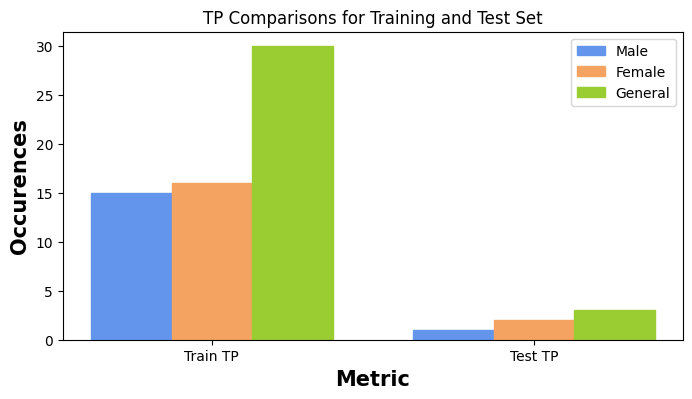

In [9]:
plotThisPlease('TP',15,1,16,2,30,3)

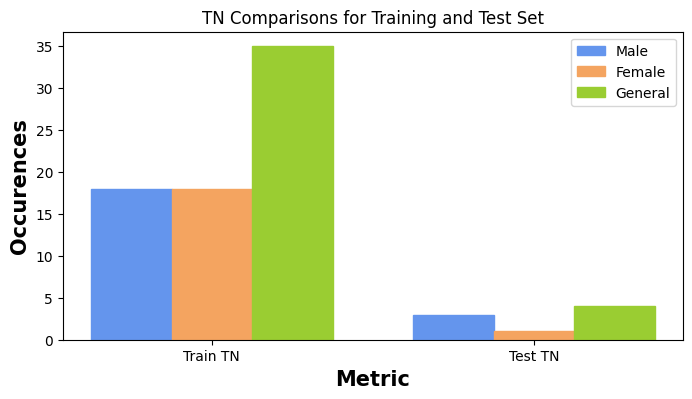

In [10]:
plotThisPlease('TN',18,3,18,1,35,4)

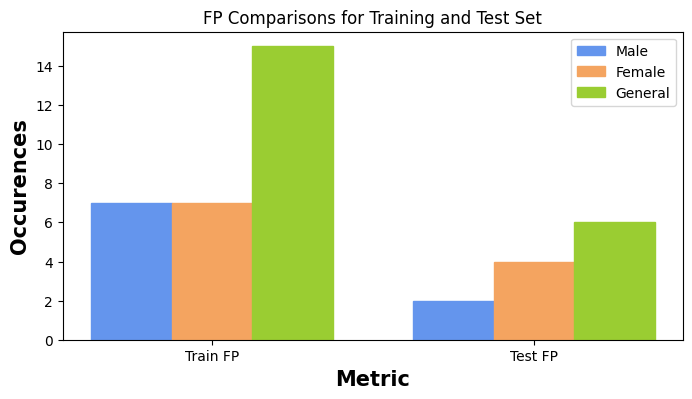

In [11]:
plotThisPlease('FP',7,2,7,4,15,6)

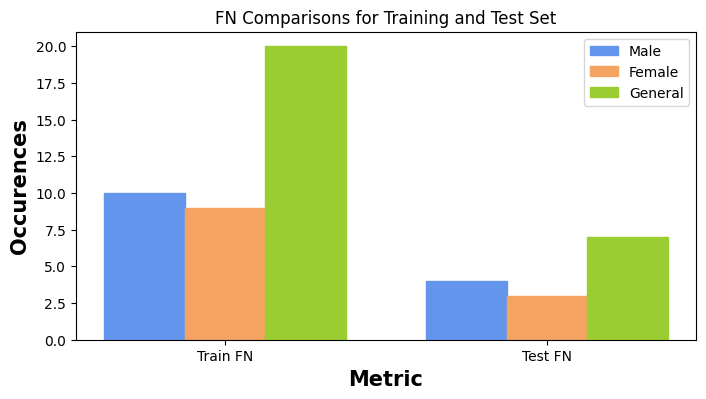

In [12]:
plotThisPlease('FN',10,4,9,3,20,7)